# Objectives
1) Complete a comprehensive analysis of the provided housing data

2) Develop an effective sale price prediction model

# Import datasets

In [68]:
import pandas as pd
print(pd.__version__)

0.24.2


In [69]:
# training/test data import
df_train = pd.read_csv('C:/Users/emag3/Documents/Code/Python/Housing Prices/train.csv')
df_test = pd.read_csv('C:/Users/emag3/Documents/Code/Python/Housing Prices/test.csv')
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Explore datasets

In [70]:
#(rows x columns)
print(str(df_train.shape))
print(str(df_test.shape))

(1460, 81)
(1459, 80)


In [71]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [72]:
#counts columns by data type
df_train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [73]:
#list columns with data type
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [74]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Visualizations

In [79]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda




<Figure size 1080x720 with 0 Axes>

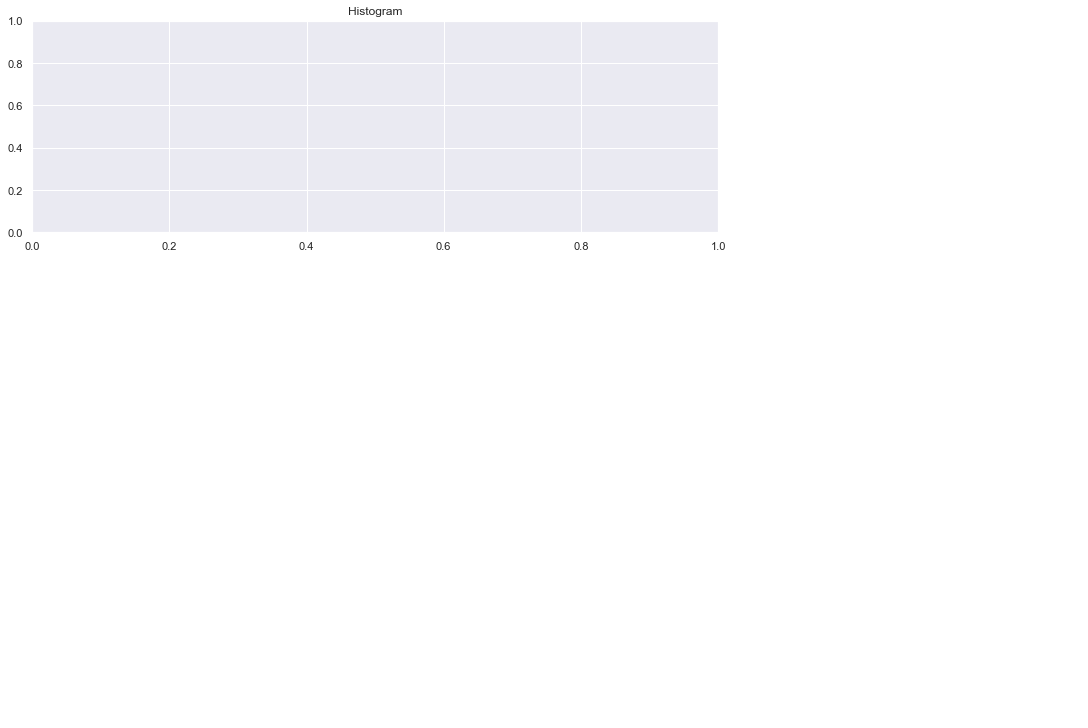

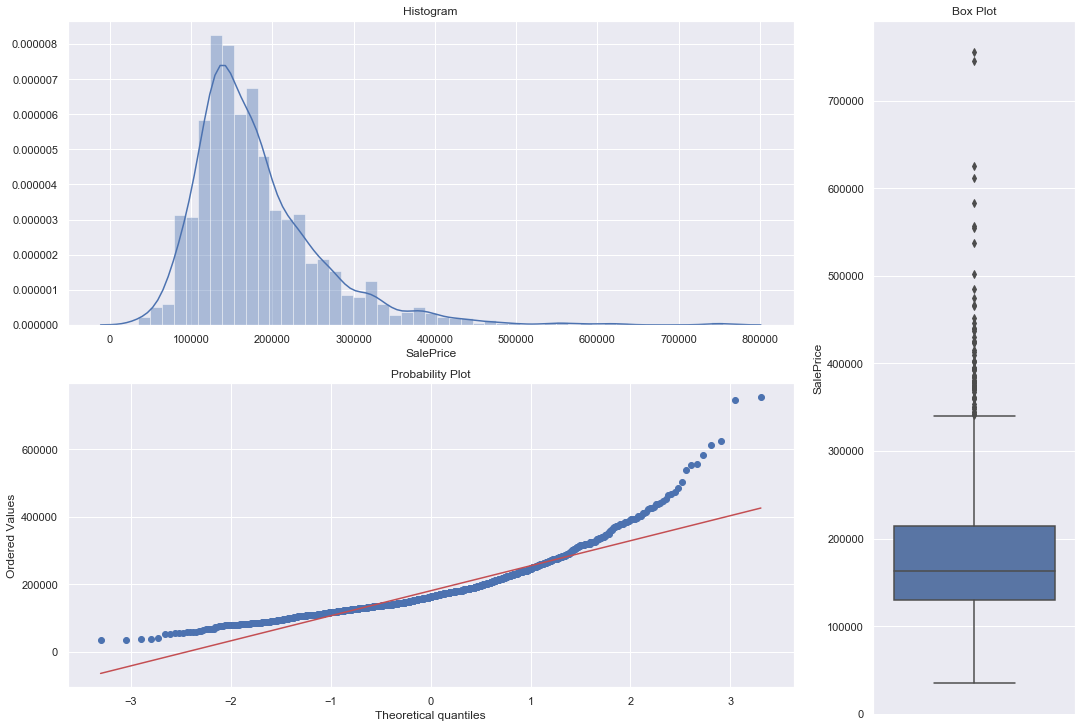

<Figure size 1080x720 with 0 Axes>

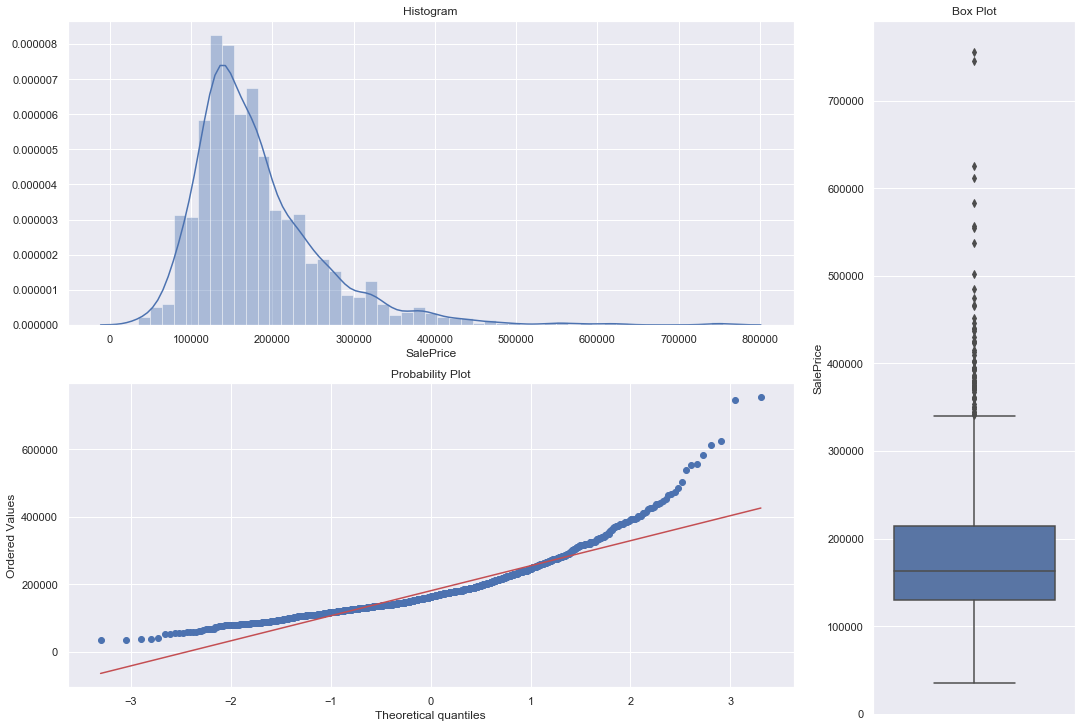

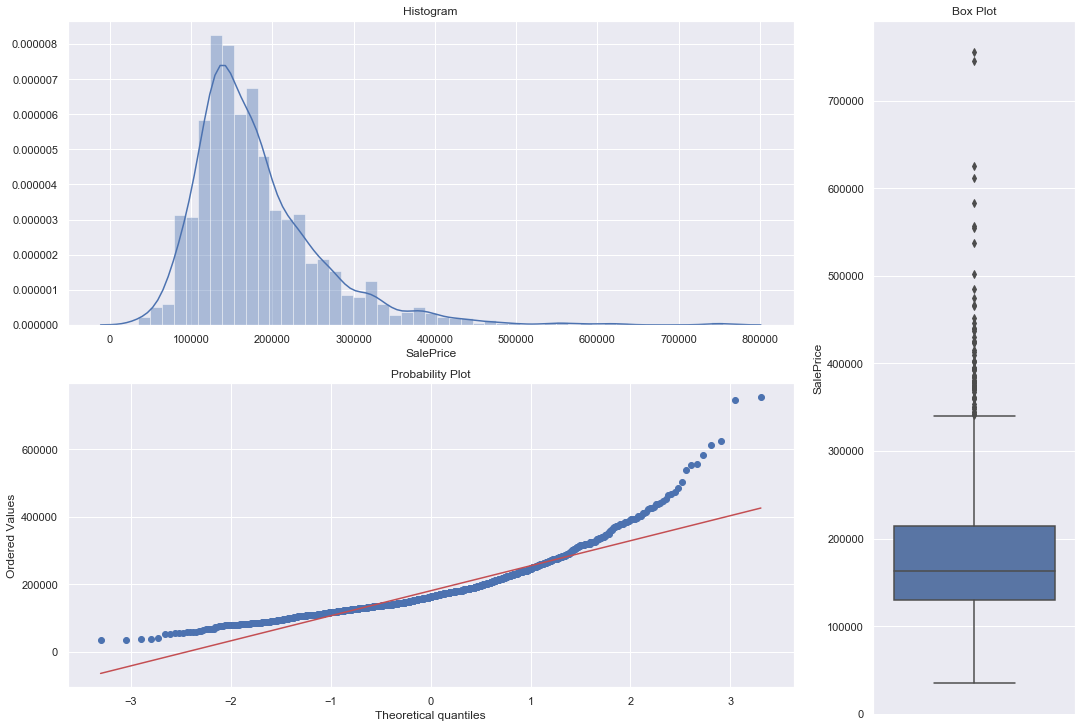

In [81]:
#creating a visualization function for quick replication during exploration
def plot_charts(dataframe, feature):
    
    #create chart
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    #create 3x3 grid
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    #plot the histogram grid, set title, and plot histogram
    axis1 = fig.add_subplot(grid[0,:2])
    axis1.set_title('Histogram')
    sns.distplot(dataframe.loc[:,feature], norm_hist=True, ax=axis1)
    
    #QQ_Plot grid, title, and plot QQ_Plot 
    axis2 = fig.add_subplot(grid[1, :2])
    axis2.set_title('QQ_plot')
    stats.probplot(dataframe.loc[:,feature], plot = axis2)

    #Box Plot grid, set title, plot Box Plot 
    axis3 = fig.add_subplot(grid[:, 2])
    axis3.set_title('Box Plot')
    sns.boxplot(dataframe.loc[:,feature], orient='v', ax = axis3);
    
plot_charts(df_train, 'SalePrice')
plt.show()

In [112]:
#after seeing the above visualizations of the predictand, we check for skewness and kurtosis:
print("Skewness: " + str(df_train['SalePrice'].skew()))
print("Kurtosis: " + str(df_train['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [120]:
#check correlations between predictors and predictand ('SalePrice')
(df_train.corr()**2)['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

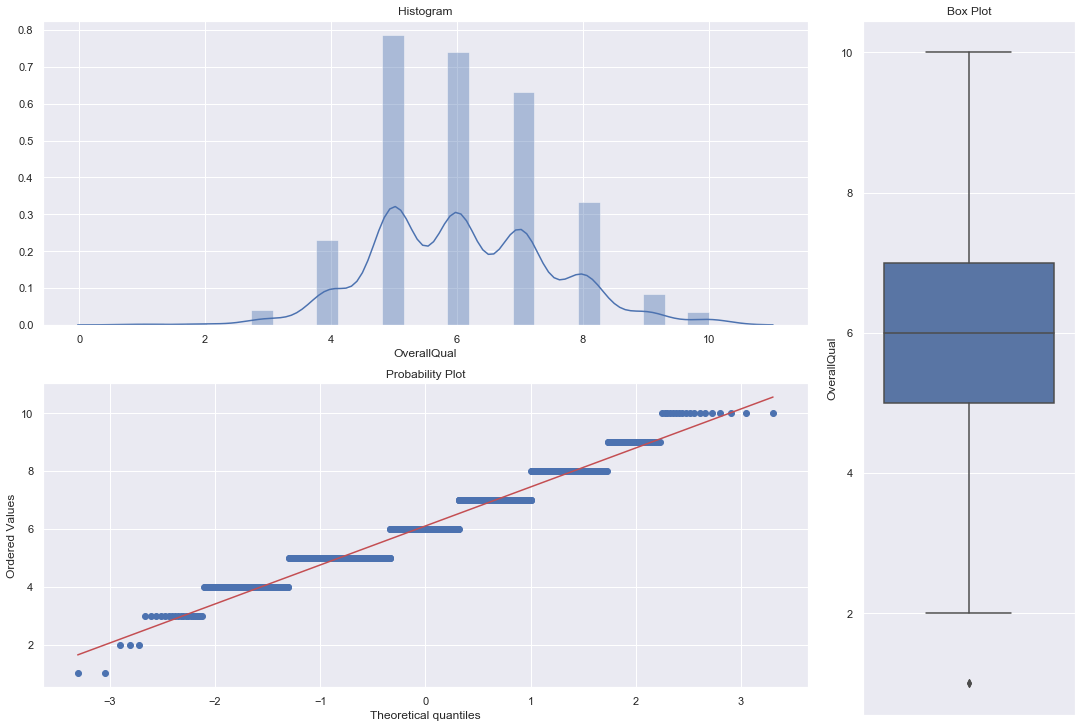

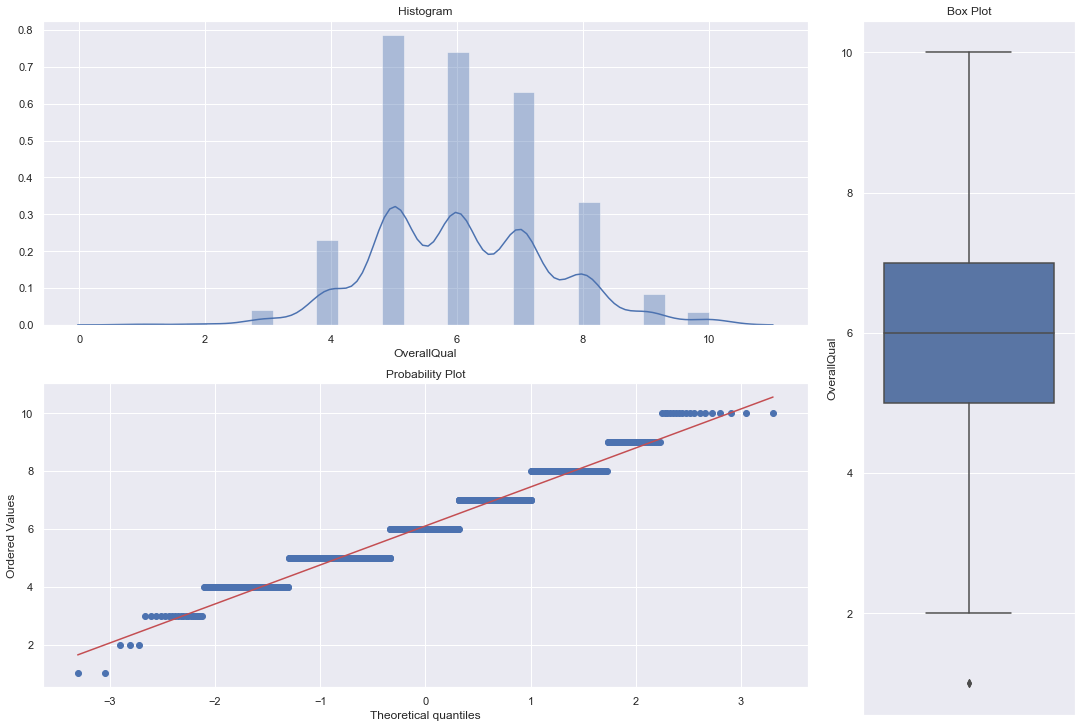

In [122]:
#examine highest-correlation feature (OverallQual)
plot_charts(df_train, 'OverallQual')
plt.show()

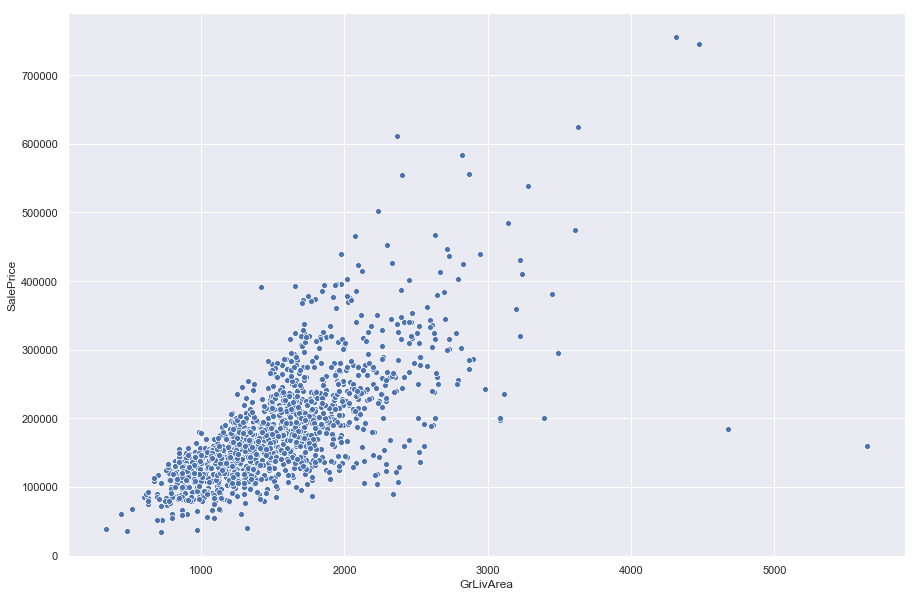

In [128]:
#create scatterplot function to further examine feature relationships
def custom_scatter(y, x):
    plt.subplots(figsize = (15,10))
    sns.scatterplot(y=y, x=x);

custom_scatter(df_train['SalePrice'], df_train['GrLivArea'])
plt.show()

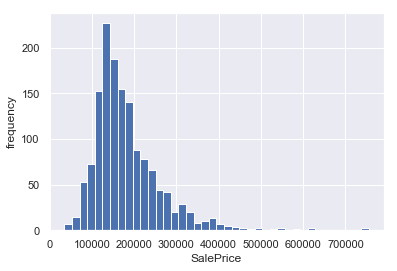

In [123]:
#Basic 'SalePrice' histogram

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_train['SalePrice'],bins=40)
plt.xlabel('SalePrice')
plt.ylabel('frequency')
plt.show()

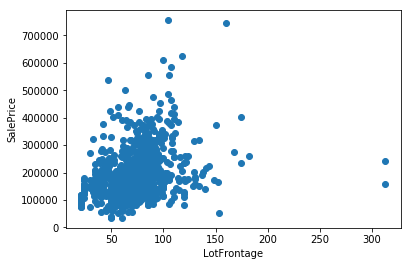

In [9]:
#Scatterplot (LotFrontage vs SalePrice)
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
ax.scatter(df_train['LotFrontage'],df_train['SalePrice'])
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.show()

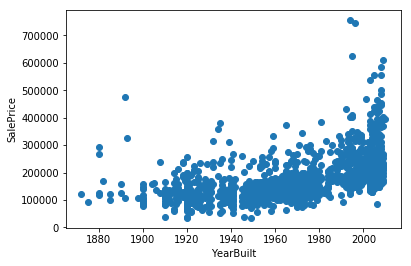

In [10]:
#Scatterplot (SalePrice vs SalePrice)
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
ax.scatter(df_train['YearBuilt'],df_train['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

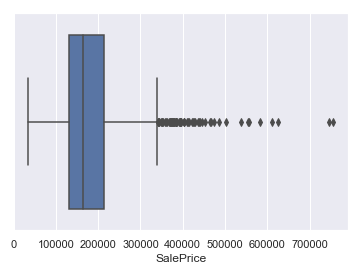

In [12]:
#Boxplot
import seaborn as sns
sns.set()
sns.boxplot(df_train['SalePrice'])
plt.show()

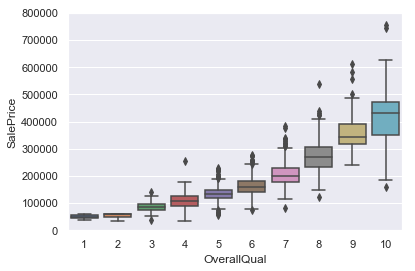

In [13]:
#boxplot with categorical variable
box_df = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
figure = sns.boxplot(x='OverallQual', y='SalePrice', data=box_df)
figure.axis(ymin=0, ymax=800000)
plt.show()

# Feature Selection

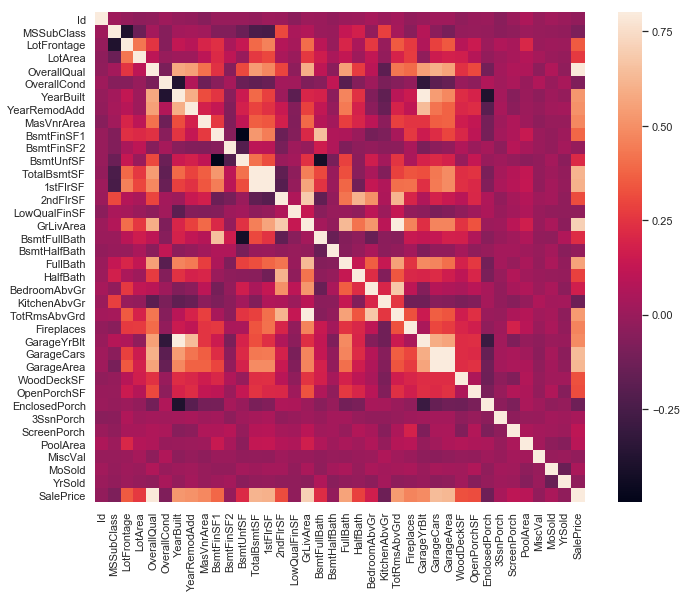

In [14]:
#correlation matrix (heatmap)
correl_mat=df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(correl_mat, vmax=.8, square=True)
plt.show()

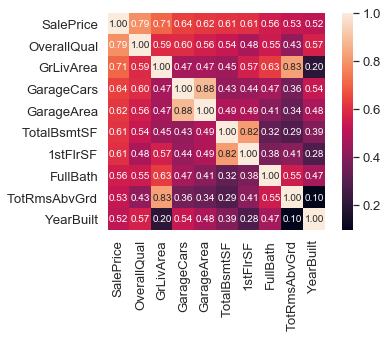

In [15]:
#correlation matrix (focused on SalePrice (our predictand))
import numpy as np
k=10
columns = correl_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[columns].values.T)
sns.set(font_scale=1.20)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=columns.values, xticklabels=columns.values)
plt.show()

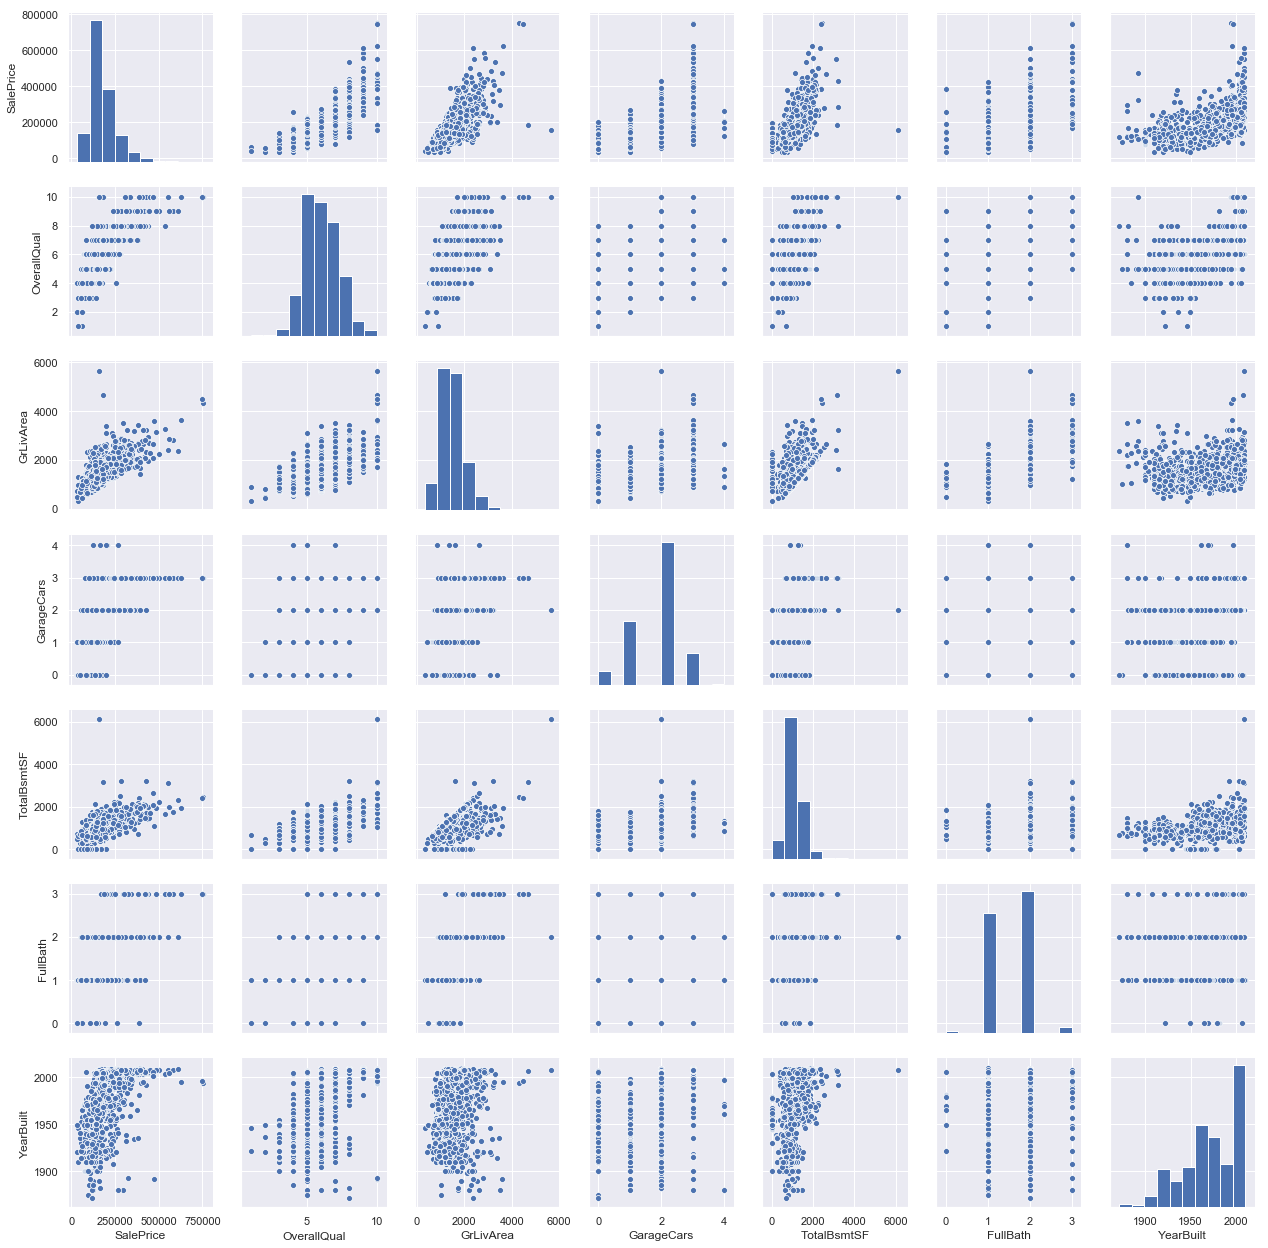

In [16]:
#informed scatterplot generation
sns.set()
columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[columns], height=2.5)
plt.show()

# Cleaning

In [17]:
print(df_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

In [18]:
#frequency table
test = df_train.groupby(['SaleType'])
test.size()

SaleType
COD        43
CWD         4
Con         2
ConLD       9
ConLI       5
ConLw       5
New       122
Oth         3
WD       1267
dtype: int64

## Duplicates

In [19]:
#remove duplicates (if any)
remove_dupes = df_train.drop_duplicates()
df_train.shape

(1460, 81)

## Missing Data

In [20]:
#check for NULL counts in each column (missing data)
TotalNulls = df_train.isnull().sum().sort_values(ascending=False)
PercentNulls = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([TotalNulls,PercentNulls], axis=1, keys=['NULL Count', '% of Total'])
missing.head(25)

,NULL Count,% of Total
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [21]:
#dealing w/ the missing data (deleting all columns w/ NULL values except 'Electrical', which only contained one)
df_train = df_train.drop((missing[missing['NULL Count'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

## Outliers

In [22]:
#Univariate Analysis
    #standardizing the predictand (set mean = 0, std_dev = 1)
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print(low_range)
print(high_range)

[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


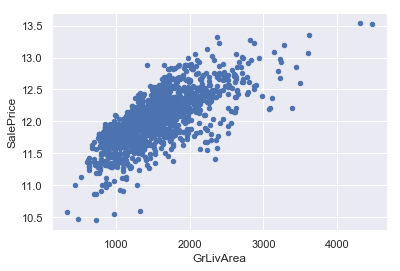

In [39]:
#further checking for outliers
scatter_data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis = 1)
scatter_data.plot.scatter(x = 'GrLivArea', y = 'SalePrice')
plt.show()

In [24]:
#remove extreme values that don't follow the overall trend
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

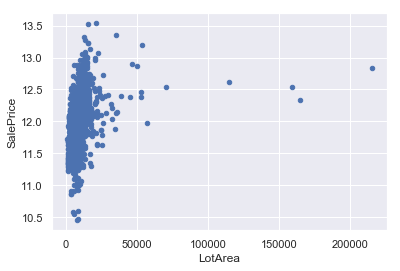

In [38]:
scatter_data = pd.concat([df_train['SalePrice'], df_train['LotArea']], axis = 1)
scatter_data.plot.scatter(x = 'LotArea', y = 'SalePrice')
plt.show()

## Statistical assumptions for SalePrice

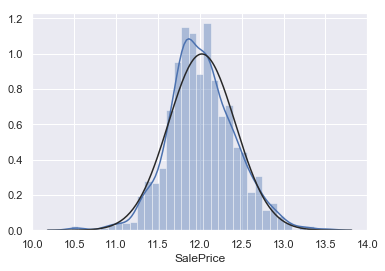

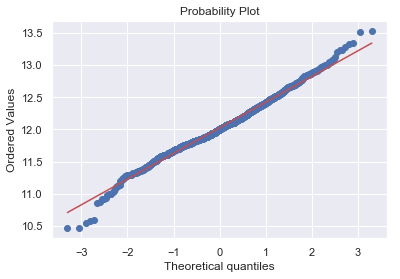

In [34]:
    #normality
#homoscedasticity
#linearity
#absence of correlated errors
from scipy import stats
from scipy.stats import norm
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

#positive skew

In [33]:
#apply log transform to attain normality
df_train['SalePrice'] = np.log(df_train['SalePrice'])

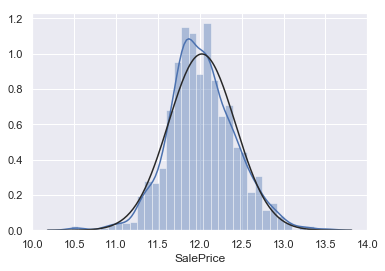

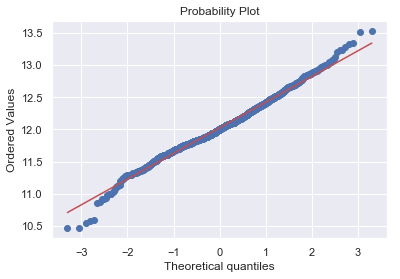

In [36]:
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

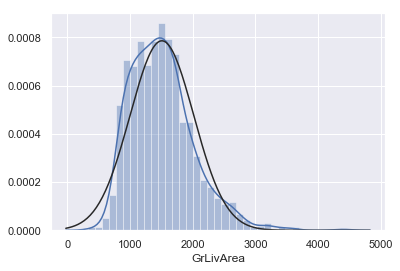

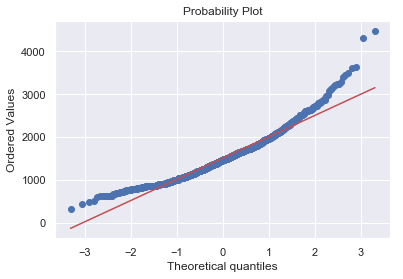

In [42]:
    #normality
#homoscedasticity
#linearity
#absence of correlated errors
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)
plt.show()

#positive skew

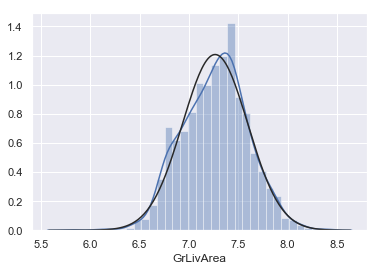

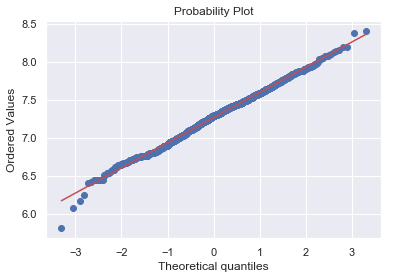

In [43]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)
plt.show()

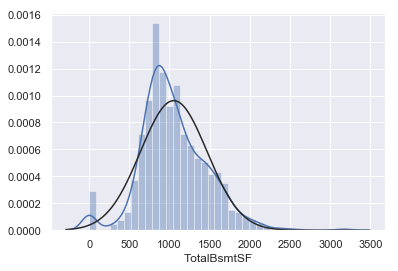

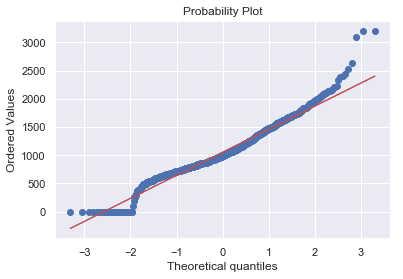

In [44]:
    #normality
#homoscedasticity
#linearity
#absence of correlated errors
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)
plt.show()

#positive skew

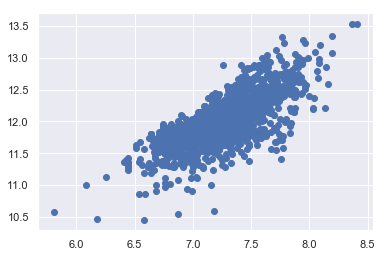

In [45]:
#normality
    #homoscedasticity
#linearity
#absence of correlated errors

plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.show()

#issue of homoscedasticity solved by earlier transformation

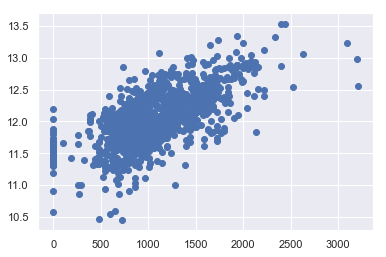

In [48]:
plt.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.show()

## Address categorical variables

In [50]:
#convert to dummy variables
df_train = pd.get_dummies(df_train)

In [51]:
df_train.head(30)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0


# Feature Selection (cont.)

In [53]:
#3 broad categories:
    #1) Filter method
    #2) Wrapper method
    #3) Embedded method
    
from sklearn.feature_selection import RFE


# Regression Model

In [52]:
from sklearn.linear_model import LinearRegression